In [1]:
# SIR Model 
# dS/dt = - beta * S * I
# dI/dt = beta * S * I - gamma * I
# dR/dt = gamma * I

# Given that beta:
# 1. gamma = constants
# 2. We know S0, I0, R0 (initial conditions)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
def sir_model(t, S, I, beta, gamma):
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I 
    return dSdt, dIdt, dRdt

In [32]:
def runge_kutta_4th_order_sir(f, t0, S0, I0, R0, beta, gamma, h, n_iters):
    # Initialize the history 
    t_values = [t0]
    S_values = [S0]
    I_values = [I0]
    R_values = [R0]

    for _ in range(n_iters):
        t = t_values[-1]
        S = S_values[-1]
        I = I_values[-1]
        R = R_values[-1]

        # Calculate k1 values
        k1_S, k1_I, k1_R = f(t, S, I, beta, gamma)

        # Calculate k2 values 
        k2_S, k2_I, k2_R = f(t + h/2, S + h/2 * k1_S, I + h/2 * k1_I, beta, gamma)

        # Calculate k3 values 
        k3_S, k3_I, k3_R = f(t + h/2, S + h/2 * k2_S, I + h/2 * k2_I, beta, gamma)

        # Calculate k4 values 
        k4_S, k4_I, k4_R = f(t + h, S + h * k3_S, I + h * k3_I, beta, gamma)

        # Update system
        S_new = S + h/6 * (k1_S + 2*k2_S + 2*k3_S + k4_S)
        I_new = I + h/6 * (k1_I + 2*k2_I + 2*k3_I + k4_I)
        R_new = R + h/6 * (k1_R + 2*k2_R + 2*k3_R + k4_R)

        t_new = t + h
        t_values.append(t_new)
        S_values.append(S_new)
        I_values.append(I_new)
        R_values.append(R_new)
    
    return t_values, S_values, I_values, R_values

In [50]:
t0 = 0
S0 = 0.99
I0 = 0.01
R0 = 0.0 

beta = 0.5
gamma = 0.1

h = 0.1
n_iters = 1000

t, S, I, R = runge_kutta_4th_order_sir(sir_model, t0, S0, I0, R0, beta, gamma, h, n_iters)

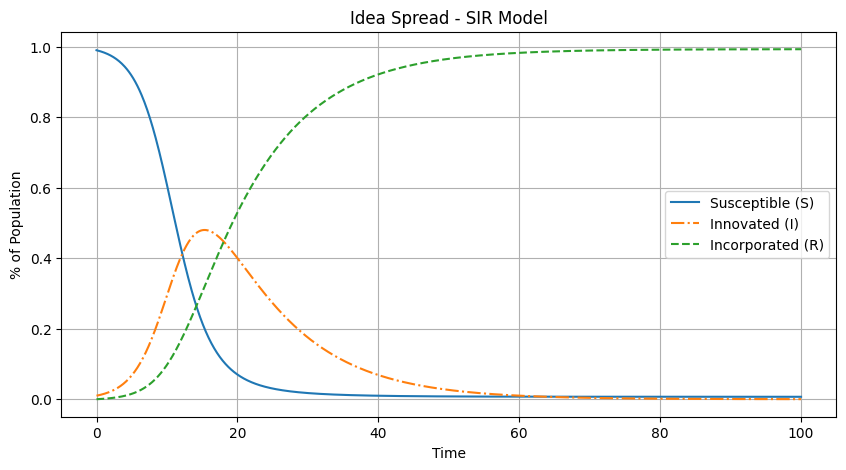

In [51]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t, S, label="Susceptible (S)")
plt.plot(t, I, label="Innovated (I)", linestyle="-.")
plt.plot(t, R, label="Incorporated (R)", linestyle="--")
plt.xlabel("Time")
plt.ylabel("% of Population")
plt.legend()
plt.title("Idea Spread - SIR Model")
plt.grid(True)
plt.show()